## Working with Images & Logistic Regression in PyTorch


In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='../GANS/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [08:43<00:00, 18943.65it/s]


Extracting ../GANS/MNIST\raw\train-images-idx3-ubyte.gz to ../GANS/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 105662.02it/s]


Extracting ../GANS/MNIST\raw\train-labels-idx1-ubyte.gz to ../GANS/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 761343.09it/s]


Extracting ../GANS/MNIST\raw\t10k-images-idx3-ubyte.gz to ../GANS/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1136395.18it/s]


Extracting ../GANS/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../GANS/MNIST\raw



In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='../GANS/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


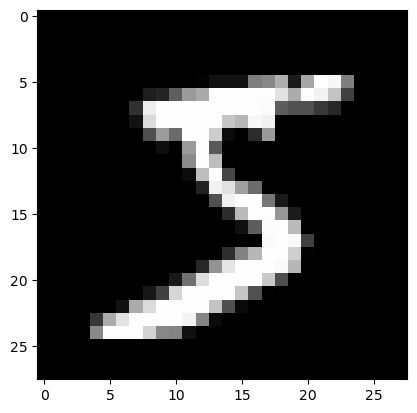

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


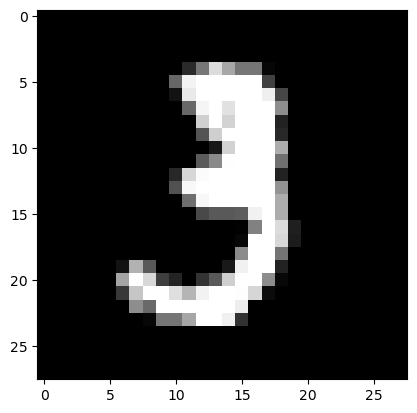

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='../GANS/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


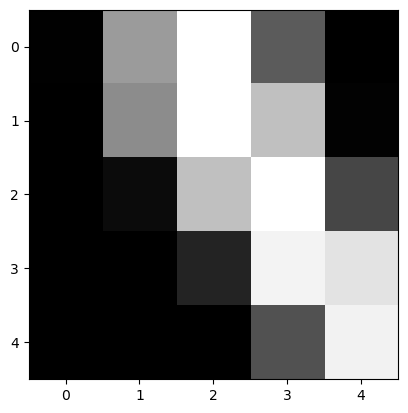

In [14]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

## Training and Validation Datasets


In [15]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [16]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

#### Model


In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0218, -0.0356, -0.0333,  ..., -0.0160, -0.0346,  0.0241],
        [-0.0185,  0.0287, -0.0332,  ...,  0.0037,  0.0151,  0.0067],
        [ 0.0144, -0.0097, -0.0327,  ..., -0.0186, -0.0096, -0.0279],
        ...,
        [-0.0022, -0.0036, -0.0062,  ...,  0.0350,  0.0138, -0.0272],
        [ 0.0067, -0.0024, -0.0164,  ..., -0.0154,  0.0212,  0.0260],
        [-0.0255, -0.0307, -0.0319,  ...,  0.0009,  0.0027,  0.0294]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0163, -0.0003, -0.0228, -0.0090, -0.0107,  0.0288, -0.0191, -0.0138,
         0.0161,  0.0220], requires_grad=True)

In [69]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 9, 4, 7, 1, 1, 6, 2, 6, 9, 4, 0, 5, 2, 2, 5, 5, 8, 5, 5, 1, 7, 6, 1,
        6, 0, 4, 7, 5, 1, 9, 9, 3, 2, 3, 2, 8, 8, 1, 4, 2, 0, 2, 1, 8, 5, 3, 3,
        0, 5, 8, 0, 4, 5, 5, 4, 9, 7, 4, 5, 4, 2, 8, 0, 0, 0, 3, 4, 1, 2, 1, 2,
        6, 2, 0, 9, 2, 6, 7, 8, 0, 7, 7, 7, 0, 4, 5, 9, 9, 7, 1, 7, 2, 7, 9, 7,
        2, 8, 3, 3, 7, 1, 6, 9, 6, 1, 9, 6, 2, 5, 2, 2, 4, 8, 5, 9, 6, 9, 8, 5,
        1, 7, 4, 7, 9, 3, 9, 7])
torch.Size([128, 1, 28, 28])
tensor([[-1.4438,  2.5384, -0.1360,  ..., -0.4895,  0.4458, -0.1924],
        [-1.8897, -1.1790, -1.2134,  ...,  1.4510,  1.3613,  2.9514],
        [ 0.5386, -2.1198,  1.0032,  ...,  0.7525, -1.0534, -0.0281],
        ...,
        [-2.0058,  2.1130,  0.5807,  ..., -0.0790,  0.4382,  0.2640],
        [-1.4232,  1.6624,  0.4060,  ...,  1.9071,  0.3299,  0.6155],
        [-0.6714, -1.9274, -0.7408,  ...,  5.9884, -0.1311,  1.7136]],
       grad_fn=<AddmmBackward0>)


In [21]:
images.shape

torch.Size([128, 1, 28, 28])

In [22]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [24]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [25]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [26]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0217, -0.0068,  0.0348,  ..., -0.0172,  0.0088, -0.0309],
         [-0.0255, -0.0250,  0.0332,  ..., -0.0288,  0.0037, -0.0305],
         [ 0.0079, -0.0229, -0.0166,  ...,  0.0338,  0.0231,  0.0148],
         ...,
         [-0.0274, -0.0235, -0.0008,  ...,  0.0262, -0.0173, -0.0012],
         [ 0.0129, -0.0259,  0.0020,  ...,  0.0221, -0.0013, -0.0289],
         [-0.0259, -0.0270, -0.0296,  ..., -0.0140, -0.0045, -0.0087]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0182, -0.0214,  0.0264,  0.0023, -0.0082, -0.0289, -0.0188,  0.0047,
         -0.0104, -0.0295], requires_grad=True)]

In [27]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0322,  0.1030,  0.0101, -0.1954,  0.1204, -0.0083, -0.1316,  0.1248,
         -0.0175, -0.3583],
        [-0.2806, -0.2267, -0.5818, -0.0242, -0.0499,  0.0145, -0.0024,  0.0357,
          0.1152, -0.1263]])


In [28]:
import torch.nn.functional as F

In [29]:
outputs[:2]

tensor([[ 0.0322,  0.1030,  0.0101, -0.1954,  0.1204, -0.0083, -0.1316,  0.1248,
         -0.0175, -0.3583],
        [-0.2806, -0.2267, -0.5818, -0.0242, -0.0499,  0.0145, -0.0024,  0.0357,
          0.1152, -0.1263]], grad_fn=<SliceBackward0>)

In [30]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1055, 0.1133, 0.1032, 0.0841, 0.1153, 0.1014, 0.0896, 0.1158, 0.1004,
         0.0714],
        [0.0831, 0.0877, 0.0615, 0.1074, 0.1047, 0.1116, 0.1097, 0.1140, 0.1234,
         0.0970]])
Sum:  1.0


In [31]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([7, 8, 7, 4, 7, 9, 7, 9, 8, 7, 4, 9, 6, 8, 3, 4, 4, 8, 9, 8, 4, 9, 9, 5,
        8, 5, 8, 8, 9, 7, 8, 4, 8, 6, 6, 2, 7, 2, 3, 8, 6, 9, 8, 6, 4, 8, 6, 4,
        3, 1, 8, 8, 4, 4, 8, 9, 4, 6, 7, 4, 8, 6, 4, 6, 6, 9, 5, 7, 4, 2, 6, 4,
        8, 7, 7, 8, 4, 8, 4, 8, 7, 4, 4, 4, 8, 9, 8, 3, 9, 9, 7, 9, 6, 6, 4, 4,
        8, 9, 8, 9, 5, 7, 9, 9, 0, 9, 7, 5, 5, 8, 6, 4, 4, 4, 0, 1, 7, 7, 1, 6,
        9, 6, 8, 5, 4, 0, 3, 9])
tensor([0.1158, 0.1234, 0.1365, 0.1269, 0.1389, 0.1155, 0.1272, 0.1141, 0.1289,
        0.1303, 0.1229, 0.1293, 0.1197, 0.1207, 0.1273, 0.1208, 0.1198, 0.1324,
        0.1199, 0.1185, 0.1299, 0.1293, 0.1203, 0.1193, 0.1325, 0.1259, 0.1292,
        0.1319, 0.1411, 0.1452, 0.1226, 0.1345, 0.1206, 0.1155, 0.1270, 0.1236,
        0.1337, 0.1170, 0.1144, 0.1263, 0.1116, 0.1146, 0.1425, 0.1188, 0.1314,
        0.1133, 0.1127, 0.1278, 0.1128, 0.1173, 0.1329, 0.1278, 0.1161, 0.1320,
        0.1248, 0.1180, 0.1314, 0.1230, 0.1288, 0.1146, 0.1252, 0.1108, 0.1231,
       

In [32]:
labels

tensor([2, 8, 6, 8, 9, 1, 0, 5, 8, 3, 4, 4, 6, 3, 8, 6, 2, 5, 3, 3, 2, 3, 4, 9,
        4, 8, 4, 9, 7, 8, 4, 8, 0, 0, 9, 7, 5, 1, 4, 4, 4, 3, 0, 6, 9, 8, 1, 7,
        1, 6, 6, 9, 6, 1, 2, 7, 5, 2, 0, 0, 2, 1, 6, 1, 3, 3, 8, 9, 0, 3, 1, 1,
        0, 8, 3, 7, 8, 5, 2, 5, 4, 2, 9, 8, 2, 1, 3, 2, 9, 5, 0, 9, 6, 5, 0, 3,
        8, 3, 9, 3, 1, 6, 8, 9, 8, 8, 0, 4, 0, 8, 6, 0, 6, 5, 4, 0, 8, 6, 3, 5,
        7, 3, 6, 8, 1, 2, 1, 7])

## Evaluation Metric and Loss Function


In [33]:
outputs[:2]

tensor([[ 0.0322,  0.1030,  0.0101, -0.1954,  0.1204, -0.0083, -0.1316,  0.1248,
         -0.0175, -0.3583],
        [-0.2806, -0.2267, -0.5818, -0.0242, -0.0499,  0.0145, -0.0024,  0.0357,
          0.1152, -0.1263]], grad_fn=<SliceBackward0>)

In [34]:
torch.sum(preds == labels)

tensor(13)

In [35]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [46]:
accuracy(outputs, labels)

tensor(0.1016)

In [37]:
probs

tensor([[0.1055, 0.1133, 0.1032,  ..., 0.1158, 0.1004, 0.0714],
        [0.0831, 0.0877, 0.0615,  ..., 0.1140, 0.1234, 0.0970],
        [0.0828, 0.0934, 0.0732,  ..., 0.1365, 0.1162, 0.0796],
        ...,
        [0.1146, 0.0894, 0.0883,  ..., 0.1101, 0.1035, 0.0935],
        [0.0915, 0.1007, 0.0977,  ..., 0.0921, 0.0874, 0.1018],
        [0.0844, 0.0954, 0.1186,  ..., 0.1163, 0.1020, 0.1235]],
       grad_fn=<SoftmaxBackward0>)

In [38]:
outputs

tensor([[ 0.0322,  0.1030,  0.0101,  ...,  0.1248, -0.0175, -0.3583],
        [-0.2806, -0.2267, -0.5818,  ...,  0.0357,  0.1152, -0.1263],
        [-0.2095, -0.0890, -0.3321,  ...,  0.2909,  0.1292, -0.2482],
        ...,
        [ 0.0497, -0.1990, -0.2109,  ...,  0.0097, -0.0521, -0.1545],
        [-0.0789,  0.0169, -0.0129,  ..., -0.0728, -0.1246,  0.0279],
        [-0.1864, -0.0642,  0.1537,  ...,  0.1342,  0.0027,  0.1937]],
       grad_fn=<AddmmBackward0>)

In [39]:
loss_fn = F.cross_entropy

In [40]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2956, grad_fn=<NllLossBackward0>)


## Training the model


In [41]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [42]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [43]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [44]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.304319381713867, 'val_acc': 0.11145173758268356}

In [45]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9399, val_acc: 0.6332
Epoch [1], val_loss: 1.6704, val_acc: 0.7420
Epoch [2], val_loss: 1.4692, val_acc: 0.7755
Epoch [3], val_loss: 1.3175, val_acc: 0.7933
Epoch [4], val_loss: 1.2008, val_acc: 0.8039


In [47]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1093, val_acc: 0.8146
Epoch [1], val_loss: 1.0359, val_acc: 0.8206
Epoch [2], val_loss: 0.9758, val_acc: 0.8262
Epoch [3], val_loss: 0.9258, val_acc: 0.8316
Epoch [4], val_loss: 0.8836, val_acc: 0.8348


In [49]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8473, val_acc: 0.8384
Epoch [1], val_loss: 0.8159, val_acc: 0.8410
Epoch [2], val_loss: 0.7885, val_acc: 0.8430
Epoch [3], val_loss: 0.7642, val_acc: 0.8456
Epoch [4], val_loss: 0.7425, val_acc: 0.8479


In [50]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7231, val_acc: 0.8503
Epoch [1], val_loss: 0.7055, val_acc: 0.8520
Epoch [2], val_loss: 0.6895, val_acc: 0.8549
Epoch [3], val_loss: 0.6750, val_acc: 0.8566
Epoch [4], val_loss: 0.6617, val_acc: 0.8580


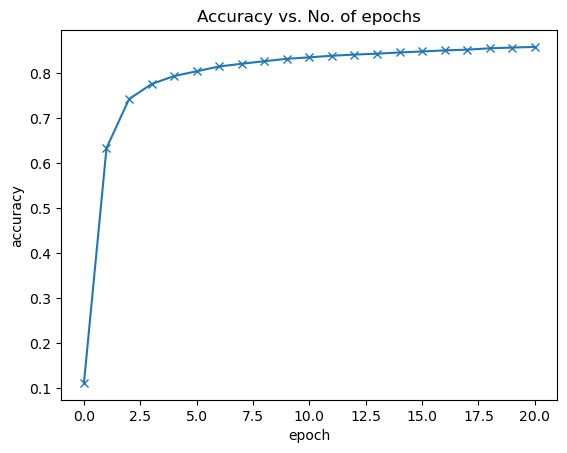

In [51]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images


In [52]:
# Define test dataset
test_dataset = MNIST(root='../GANS/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


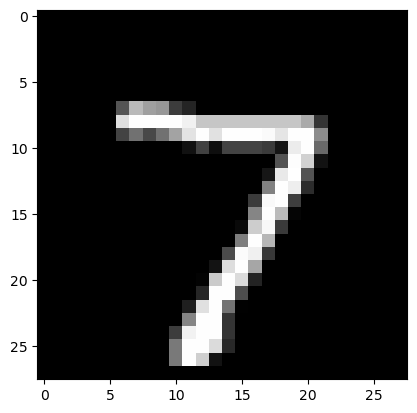

In [53]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [54]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


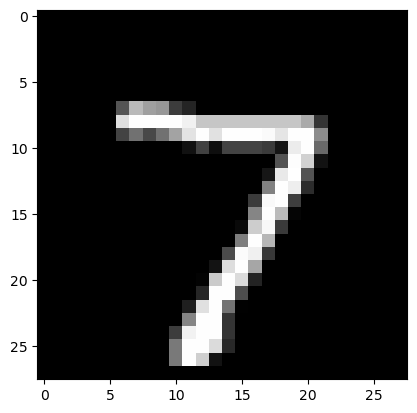

In [55]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


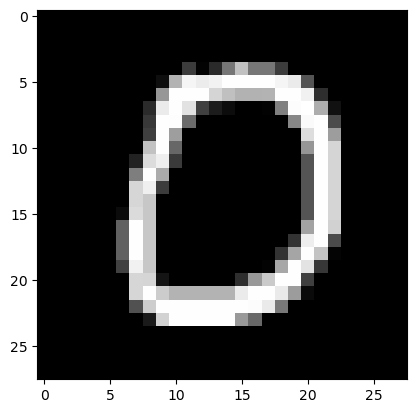

In [56]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


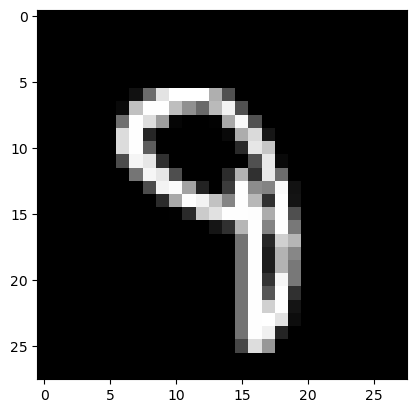

In [57]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


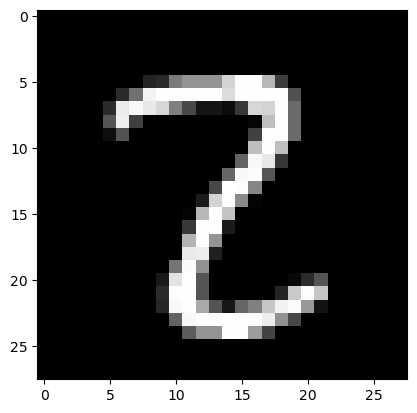

In [68]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [59]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.641363263130188, 'val_acc': 0.8594726324081421}

### Saving and loading the model


In [60]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [61]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0211, -0.0150,  0.0329,  ...,  0.0108,  0.0046,  0.0082],
                      [-0.0136,  0.0177, -0.0253,  ...,  0.0220, -0.0175, -0.0134],
                      [-0.0186, -0.0174,  0.0032,  ..., -0.0054,  0.0037, -0.0080],
                      ...,
                      [ 0.0034, -0.0104, -0.0084,  ..., -0.0310, -0.0002, -0.0178],
                      [ 0.0199,  0.0222, -0.0118,  ...,  0.0048,  0.0053, -0.0069],
                      [ 0.0326, -0.0105, -0.0078,  ..., -0.0078,  0.0076,  0.0277]])),
             ('linear.bias',
              tensor([-0.0386,  0.0845, -0.0093, -0.0005,  0.0068,  0.0101, -0.0152,  0.0217,
                      -0.0825, -0.0084]))])

In [62]:
model2 = MnistModel()

In [63]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0275,  0.0237, -0.0094,  ...,  0.0026, -0.0248,  0.0028],
                      [ 0.0014,  0.0181, -0.0289,  ..., -0.0006,  0.0076,  0.0173],
                      [-0.0171,  0.0177,  0.0002,  ..., -0.0091, -0.0022, -0.0312],
                      ...,
                      [ 0.0319, -0.0143, -0.0279,  ..., -0.0260,  0.0307, -0.0220],
                      [-0.0333, -0.0196, -0.0205,  ...,  0.0124,  0.0231, -0.0184],
                      [-0.0070, -0.0011,  0.0093,  ...,  0.0086,  0.0301,  0.0179]])),
             ('linear.bias',
              tensor([-0.0325,  0.0125,  0.0218, -0.0251,  0.0346,  0.0078, -0.0341,  0.0263,
                       0.0027,  0.0173]))])

In [64]:
evaluate(model2, test_loader)

{'val_loss': 2.3471343517303467, 'val_acc': 0.11005859076976776}

In [65]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0211, -0.0150,  0.0329,  ...,  0.0108,  0.0046,  0.0082],
                      [-0.0136,  0.0177, -0.0253,  ...,  0.0220, -0.0175, -0.0134],
                      [-0.0186, -0.0174,  0.0032,  ..., -0.0054,  0.0037, -0.0080],
                      ...,
                      [ 0.0034, -0.0104, -0.0084,  ..., -0.0310, -0.0002, -0.0178],
                      [ 0.0199,  0.0222, -0.0118,  ...,  0.0048,  0.0053, -0.0069],
                      [ 0.0326, -0.0105, -0.0078,  ..., -0.0078,  0.0076,  0.0277]])),
             ('linear.bias',
              tensor([-0.0386,  0.0845, -0.0093, -0.0005,  0.0068,  0.0101, -0.0152,  0.0217,
                      -0.0825, -0.0084]))])

In [66]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.641363263130188, 'val_acc': 0.8594726324081421}